# Task C1 - XOR (Converges) 

In [424]:
import torch 
import torch.nn as nn 
import matplotlib.pyplot as plt 

In [425]:
x_train = torch.FloatTensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
y_train = torch.FloatTensor([[0.0], [1.0], [1.0], [0.0]])

In [426]:
class Model(nn.Module):
    def __init__(self, in_features, h1, out_features):
        super().__init__()
        
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, out_features)
        
    def f1(self, x):
        return torch.sigmoid(self.fc1(x))
    
    def f2(self, x):
        return torch.sigmoid(self.fc2(x))

    def forward(self, x):
        return self.f2(self.f1(x))
    
    def loss(self, x, y): 
        return torch.nn.functional.binary_cross_entropy(self.forward(x), y)

In [427]:
model = Model(2, 2, 1)

In [428]:
learning_rate = 0.1
epochs = 20000

In [429]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [430]:
loss = 0 
losses = []

In [431]:
 for i in range(epochs):
    y_pred = model.forward(x_train)

    loss = model.loss(x_train, y_train)
    losses.append(loss)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    i += 1

## Loss graph

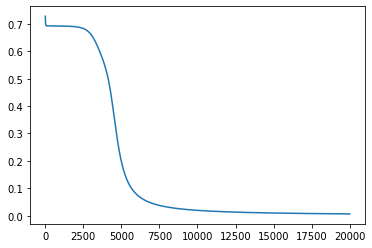

In [432]:
plt.plot(range(epochs), losses)

## Optimization result

In [438]:
W1 = model.fc1.weight.detach().numpy()
W2 = model.fc2.weight.detach().numpy()
b1 = model.fc1.bias.detach().numpy()
b2 = model.fc2.bias.detach().numpy()

print(f'W1:\n {W1}\n')
print(f'b1:\n {b1}\n')

print(f'W2:\n {W2}\n')
print(f'b2:\n {b2}\n')

print(f'loss: {loss}')

W1:
 [[-6.83661    6.6507583]
 [-6.3687882  6.646231 ]]

b1:
 [-3.5585139  3.168268 ]

W2:
 [[ 11.516166 -11.040227]]

b2:
 [5.19745]

loss: 0.006412998773157597


## Optimization graph

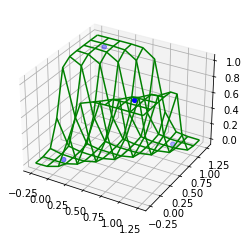

In [434]:
fig = plt.figure('Linear regression: 3D')
plot = fig.add_subplot(111, projection='3d')

# Draws test data (points)
plot.scatter(x_train[:, 0], x_train[:, 1], y_train, color='blue')

# Initializes the x-grids
x1_grid, x2_grid = torch.meshgrid(torch.linspace(-0.25, 1.25, 10), torch.linspace(-0.25, 1.25, 10))

# Initializes the corresponding y-grid
y_grid = torch.empty([10, 10])
for i in range(0, x1_grid.shape[0]):
    for j in range(0, x1_grid.shape[1]):
            x_plot = torch.FloatTensor([[x1_grid[i, j], x2_grid[i, j]]])
            y_grid[i, j] = model.forward(x_plot)


# Draws the optimization 
plot_f = plot.plot_wireframe(x1_grid.detach(), x2_grid.detach(), y_grid.detach(), color='green')